# Project description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## **Plan of research:**  

**Step 1.**  
Download the data and prepare it for analysis conclusions;

**Step 2. Data analysis:**  

- Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
- Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

**Step 3. Conclusions**  

Overall conclusion and recommendations on restaurant type and number of seats. The possibility of developing a chain.

**Step 4. Presentation**

## Import & install libraries for research

In [1]:
!pip install plotly

In [2]:
#!pip install street-address
!pip install street-address

  Created wheel for street-address: filename=street_address-0.4.0-py3-none-any.whl size=6449 sha256=ad69c7887226b87ee852fa2dd24e2eca316fe5c465b60b501c6f958a7bdbc520
  Stored in directory: /home/jovyan/.cache/pip/wheels/6a/91/8c/75901fb4298efb8f0c64445225e73036c0e7b9445dc80203ab
Successfully built street-address


Let's start by importing the needed libraries and modules.

In [3]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from matplotlib import pyplot as plt

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

import seaborn as sns

In [4]:
def data_info(data):
    print('-'*65)
    print('\033[1m INFO: \033[0m ')
    print(' ')
    display( data.info(memory_usage='deep'))
    print('-'*65)
    print('\033[1m HEAD: \033[0m ')
    display( data.head(10))
    print('-'*65)
    print('\033[1m DESCRIBE: \033[0m ')
    print(' ')
    display( data.describe())
    print('-'*65)
    print('\033[1m MISSING VALUES: \033[0m ')
    print(' ')
    display( data.isna().sum())
    print('-'*65)
    print('\033[1m DUPLICATED: \033[0m')
    print('We have {} duplicated rows!'.format(data.duplicated().sum()))

#for convenience, display a table of all columns and convert the data to the format of three decimal places
#pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.3f}'.format
#ssetting seaborn visualization
sns.set_palette('Dark2')
sns.set_style('darkgrid')

## Step 1. Description the data

### Load data

We have to load the database, analyze the data for incorrect and missing values. After we prepare our database for work, we need to turn to the main tasks that we want to study.

In [5]:
#creating variable for dataset path
data_path = '/datasets/rest_data_us.csv'

In [6]:
try:
    rest = pd.read_csv('rest_data_us.csv')
    
except:
    rest = pd.read_csv(data_path)

### Study data

The `rest_data_us` table contains:

`id` - restaurant's unique identifier;  
`object_name` - restaurant name;  
`address` — restaurant address;  
`chain` - restaurant a chain or not;  
`object_type` - type of restaurant;  
`number` - numbers of seats in restaurant

In [7]:
data_info(rest)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


None

-----------------------------------------------------------------
 HEAD:  


id          object_name                          address  chain  \
0  11786  HABITAT COFFEE SHOP  3708 N EAGLE ROCK BLVD           False   
1  11787  REILLY'S             100 WORLD WAY # 120              False   
2  11788  STREET CHURROS       6801 HOLLYWOOD BLVD # 253        False   
3  11789  TRINITI ECHO PARK    1814 W SUNSET BLVD               False   
4  11790  POLLEN               2100 ECHO PARK AVE               False   
5  11791  THE SPOT GRILL       10004 NATIONAL BLVD              False   
6  11792  CPK                  100 WORLD WAY # 126              False   
7  11793  PHO LALA             3500 W 6TH ST STE 226            False   
8  11794  ABC DONUTS           3027 N SAN FERNANDO RD UNIT 103  True    
9  11795  UPSTAIRS             3707 N CAHUENGA BLVD             False   

  object_type  number  
0  Cafe        26      
1  Restaurant  9       
2  Fast Food   20      
3  Restaurant  22      
4  Restaurant  20      
5  Restaurant  14      
6  Restaurant  100     
7  Restaurant  7       
8  Fast Food   1       
9  Restaurant  35

-----------------------------------------------------------------
 DESCRIBE:  
 


id    number
count 9,651.000  9,651.000
mean  16,611.000 43.695   
std   2,786.148  47.623   
min   11,786.000 1.000    
25%   14,198.500 14.000   
50%   16,611.000 27.000   
75%   19,023.500 46.000   
max   21,436.000 229.000

-----------------------------------------------------------------
 MISSING VALUES:  
 


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 0 duplicated rows!


**Conclusions**

Our data has 9651 rows and 6 columns total. Presented data in columns - 2 numeric and 4 objects type. We have 3 missing values in column `chain`.

We need to do some changes with data:

- rename the columns for more convenient work;  
- check and drop missing values in column `chain`;  
- changing `chain` column data type to boolean; 
- converting column `type` to a categorical variable will save some memory

In [8]:
#rename column names 
rest.columns=['id', 'name', 'address', 'chain', 'type', 'seats']

In [9]:
#checking missing values in 'chain' column
rest[rest['chain'].isna()]

id                     name               address chain        type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD  NaN   Restaurant   
7523  19309  JAMMIN JIMMY'S PIZZA     1641 FIRESTONE BLVD   NaN   Pizza        
8648  20434  THE LEXINGTON THEATER    129 E 3RD ST          NaN   Restaurant   

      seats  
7408  14     
7523  1      
8648  35

In [10]:
#dropping rows with missing values
rest = rest.drop(rest[rest['chain'].isna()].index)
rest['chain'].isna().sum()

0

In [11]:
#changing 'chain' column data type
rest['chain'] = rest['chain'].astype('bool')

In [12]:
#Converting column 'type' to a categorical variable will save some memory
rest['type'] = rest['type'].astype('category')

In [13]:
rest['type'].value_counts()

Restaurant    7253
Fast Food     1066
Cafe          435 
Pizza         319 
Bar           292 
Bakery        283 
Name: type, dtype: int64

In [14]:
rest['seats'].describe()

count   9,648.000
mean    43.704   
std     47.627   
min     1.000    
25%     14.000   
50%     27.000   
75%     46.000   
max     229.000  
Name: seats, dtype: float64

In [15]:
#check the data after the changes
rest.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       9648 non-null   int64   
 1   name     9648 non-null   object  
 2   address  9648 non-null   object  
 3   chain    9648 non-null   bool    
 4   type     9648 non-null   category
 5   seats    9648 non-null   int64   
dtypes: bool(1), category(1), int64(2), object(2)
memory usage: 1.6 MB


In [16]:
#data sample
rest.sample(5)

id                       name                      address  chain  \
3104  14890  CHLOE'S PUB @ GOLDEN ROAD  5410 N SAN FERNANDO RD W     False   
4732  16518  HOMEBOY                    400 WORLD WAY # T4K          False   
3791  15577  FIN                        12223 W WASHINGTON BLVD      False   
7226  19012  YOGURTLAND                 5857 S CENTRAL AVE # 120     True    
415   12201  MOO BONG RI                1300 S SAN PEDRO ST STE 201  False   

            type  seats  
3104  Restaurant  212    
4732  Restaurant  14     
3791  Restaurant  102    
7226  Restaurant  18     
415   Restaurant  47

**Conclusions**  
We have downloaded and explored the dataset. There are no duplicate rows, but there are three rows with missing values in the string column and we just removed those rows. We can change the data type of the 'chain' column to 'boolean' and type of the 'type' column to 'category'. All this allowed us to reduce memory usage.

 Most of all `restaurants` are represented in our database - 7253. This is seven times more than `Fast Food` - 1066.
We also checked the distribution of values in the `seat` column, from **1 to 229 seats**. It is possible that establishments that have **one** seat are establishments that provide takeaway food. In the future, we will consider separately both establishments with one 'seats' and restaurants.

### Preparing the data data for study

#### Name

In [17]:
print(f'Number of unique restaurants:', len(rest['name'].sort_values().unique()))

Number of unique restaurants: 8669


In [18]:
rest.name.value_counts()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
                              ..
TACO BELL #4634               1 
INDIA JONES THE KITCHEN       1 
CHOW MEIN CHINESE             1 
CINDY'S RESTAURANT            1 
EL HUARIQUE CULVER CITY       1 
Name: name, Length: 8669, dtype: int64

In [19]:
rest[rest['name'] =='THE COFFEE BEAN & TEA LEAF']

id                        name                        address  chain  \
1154  12940  THE COFFEE BEAN & TEA LEAF  5700 WILSHIRE BLVD STE 120     True    
1939  13725  THE COFFEE BEAN & TEA LEAF  5970 W OLYMPIC BLVD            True    
2223  14009  THE COFFEE BEAN & TEA LEAF  6922 HOLLYWOOD BLVD STE #103   True    
2610  14396  THE COFFEE BEAN & TEA LEAF  3607 TROUSDALE PKWY            True    
2912  14698  THE COFFEE BEAN & TEA LEAF  5979 W 3RD ST                  True    
3086  14872  THE COFFEE BEAN & TEA LEAF  6333 W 3RD ST STE E-11         True    
3177  14963  THE COFFEE BEAN & TEA LEAF  300 S LA CIENEGA BLVD          True    
3351  15137  THE COFFEE BEAN & TEA LEAF  7235 BEVERLY BLVD              True    
4060  15846  THE COFFEE BEAN & TEA LEAF  6255 W SUNSET BLVD             True    
4162  15948  THE COFFEE BEAN & TEA LEAF  950 WESTWOOD BLVD              True    
4324  16110  THE COFFEE BEAN & TEA LEAF  3183 WILSHIRE BLVD STE #115A   True    
5192  16978  THE COFFEE BEAN & TEA LEAF  210 E OLYMPIC BLVD STE #120    True    
5355  17141  THE COFFEE BEAN & TEA LEAF  801 W 7TH ST                   True    
5905  17691  THE COFFEE BEAN & TEA LEAF  1500 WESTWOOD BLVD             True    
6289  18075  THE COFFEE BEAN & TEA LEAF  7915 W SUNSET BLVD             True    
6371  18157  THE COFFEE BEAN & TEA LEAF  3800 WILSHIRE BLVD # 102       True    
6482  18268  THE COFFEE BEAN & TEA LEAF  10897 W PICO BLVD              True    
6494  18280  THE COFFEE BEAN & TEA LEAF  450 S WESTERN AVE              True    
6511  18297  THE COFFEE BEAN & TEA LEAF  11049 SANTA MONICA BLVD # 109  True    
6557  18343  THE COFFEE BEAN & TEA LEAF  3550 WILSHIRE BLVD # 105       True    
6596  18382  THE COFFEE BEAN & TEA LEAF  209 S MEDNIK AVE               True    
6619  18405  THE COFFEE BEAN & TEA LEAF  10401 SANTA MONICA BLVD        True    
6741  18527  THE COFFEE BEAN & TEA LEAF  10419 W VENICE BLVD            True    
6933  18719  THE COFFEE BEAN & TEA LEAF  3470 S SEPULVEDA BLVD          True    
7005  18791  THE COFFEE BEAN & TEA LEAF  2000 AVE OF STARS STE 40       True    
7136  18922  THE COFFEE BEAN & TEA LEAF  10800 W PICO BLVD STE 316      True    
7253  19039  THE COFFEE BEAN & TEA LEAF  3726 S FIGUEROA ST             True    
7538  19324  THE COFFEE BEAN & TEA LEAF  135 N LARCHMONT BLVD           True    
7580  19366  THE COFFEE BEAN & TEA LEAF  601 W 5TH ST # #R1             True    
7607  19393  THE COFFEE BEAN & TEA LEAF  3435 WILSHIRE BLVD STE 141     True    
7690  19476  THE COFFEE BEAN & TEA LEAF  574 HILGARD AVE                True    
7808  19594  THE COFFEE BEAN & TEA LEAF  11913 W OLYMPIC BLVD           True    
8002  19788  THE COFFEE BEAN & TEA LEAF  1001 GAYLEY AVE # B            True    
8123  19909  THE COFFEE BEAN & TEA LEAF  800 WORLD WAY 8D               True    
8164  19950  THE COFFEE BEAN & TEA LEAF  8500 BEVERLY BLVD STE K606     True    
8556  20342  THE COFFEE BEAN & TEA LEAF  2081 HILLHURST AVE             True    
8906  20692  THE COFFEE BEAN & TEA LEAF  8631 W 3RD ST # 311E           True    
8944  20730  THE COFFEE BEAN & TEA LEAF  700 WORLD WAY                  True    
8972  20758  THE COFFEE BEAN & TEA LEAF  5115 WILSHIRE BLVD STE G       True    
9011  20797  THE COFFEE BEAN & TEA LEAF  11698 SAN VICENTE BLVD         True    
9022  20808  THE COFFEE BEAN & TEA LEAF  1845 S LA CIENEGA BLVD # B     True    
9085  20871  THE COFFEE BEAN & TEA LEAF  645 W 9TH ST STE #108          True    
9268  21054  THE COFFEE BEAN & TEA LEAF  6151 W CENTURY BLVD            True    
9278  21064  THE COFFEE BEAN & TEA LEAF  9541 W PICO BLVD               True    
9305  21091  THE COFFEE BEAN & TEA LEAF  500 WORLD WAY T5               True    
9310  21096  THE COFFEE BEAN & TEA LEAF  10612 NATIONAL BLVD            True    
9322  21108  THE COFFEE BEAN & TEA LEAF  500 WORLD WAY                  True    

      type  seats  
1154  Cafe  74     
1939  Cafe  22     
2223  Cafe  21     
2610  Cafe  43     
2912  Cafe  7      


#### Address

In [20]:
rest['address'].unique()

array(['3708 N EAGLE ROCK BLVD', '100 WORLD WAY # 120',
       '6801 HOLLYWOOD BLVD # 253', ..., '6741 HOLLYWOOD BLVD',
       '548 S SPRING ST STE 100', '1300 S SAN PEDRO ST STE 111'],
      dtype=object)

In [21]:
print(f'Number of unique address:', len(rest['address'].sort_values().unique()))

Number of unique address: 8514


In [22]:
address_pivot = rest.pivot_table(index='address',
                     values='id',
                     aggfunc='count').reset_index()
address_pivot[address_pivot['id']!=1].sort_values(by='id', ascending=False).reset_index(drop=True)

address  id
0    3607 TROUSDALE PKWY       11
1    135 N GRAND AVE           10
2    600 WORLD WAY             9 
3    5151 STATE UNIVERSITY DR  9 
4    400 WORLD WAY             9 
..             ...            .. 
908  2604 S SAN PEDRO ST       2 
909  2619 W SUNSET BLVD        2 
910  2622 N FIGUEROA ST        2 
911  2635 E 4TH ST             2 
912  998 S ROBERTSON BLVD      2 

[913 rows x 2 columns]

In [23]:
rest[rest['address'] =='3607 TROUSDALE PKWY']

id                         name              address  chain  \
457   12243  USC MAIN KITCHEN-BASEMENT    3607 TROUSDALE PKWY  True    
462   12248  TRADITIONS PUB               3607 TROUSDALE PKWY  False   
480   12266  PANDA  EXPRESS               3607 TROUSDALE PKWY  False   
858   12644  MORETON FIGS RESTAURANT/BAR  3607 TROUSDALE PKWY  True    
863   12649  VERDE                        3607 TROUSDALE PKWY  False   
888   12674  CALIFORNIA PIZZA KITCHEN     3607 TROUSDALE PKWY  True    
2610  14396  THE COFFEE BEAN & TEA LEAF   3607 TROUSDALE PKWY  True    
3268  15054  THE HABIT BURGER GRILL       3607 TROUSDALE PKWY  False   
6311  18097  LEMONADE                     3607 TROUSDALE PKWY  True    
7698  19484  LEMONADES                    3607 TROUSDALE PKWY  True    
7756  19542  COFFEE BEAN & TEA LEAF       3607 TROUSDALE PKWY  True    

            type  seats  
457   Restaurant  227    
462   Restaurant  197    
480   Fast Food   40     
858   Bar         107    
863   Restaurant  39     
888   Pizza       44     
2610  Cafe        43     
3268  Fast Food   43     
6311  Restaurant  138    
7698  Restaurant  111    
7756  Cafe        31

In [24]:
print(f'Number of establishments that have a unique own address:', len(address_pivot[address_pivot['id']==1]))

Number of establishments that have a unique own address: 7601


In [25]:
rest_name = rest.groupby('name').agg({'id' : 'count'})
rest_name.sort_values(by='id', ascending=False).head(10)


id
name                          
THE COFFEE BEAN & TEA LEAF  47
SUBWAY                      31
DOMINO'S PIZZA              15
KENTUCKY FRIED CHICKEN      14
WABA GRILL                  14
TRIMANA                     13
MCDONALD'S                  13
YOGURTLAND                  12
STARBUCKS                   12
PAPA JOHN'S PIZZA           12

**Conclusions**
- We see that the two chains are represented the most - these are **`THE COFFEE BEAN & TEA LEAF`** (type - `Cafe`, 47 establishments) and **`SUBWAY`** (type - `Fast Food`, 31 establishments).
- We have addresses where there are from 9 or more establishments. It is possible that these are business or shopping centers. For example, 3607 TROUSDALE PKWY, which contains 11 establishments of all types. Checking the address showed it was a UNIVERSITY OF SOUTHERN CALIFORNIA.

## Step 2. Data analysis


- Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
- Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

### Investigate the proportions of the various types of establishments. Plot a graph.

In [26]:
rest.head()

id                 name                    address  chain        type  \
0  11786  HABITAT COFFEE SHOP  3708 N EAGLE ROCK BLVD     False  Cafe         
1  11787  REILLY'S             100 WORLD WAY # 120        False  Restaurant   
2  11788  STREET CHURROS       6801 HOLLYWOOD BLVD # 253  False  Fast Food    
3  11789  TRINITI ECHO PARK    1814 W SUNSET BLVD         False  Restaurant   
4  11790  POLLEN               2100 ECHO PARK AVE         False  Restaurant   

   seats  
0  26     
1  9      
2  20     
3  22     
4  20

In [27]:
#creating dataframe by groupby with information needed
rest_establishments = (rest.groupby('type', as_index=False)
                     .agg({'name' : 'count', 'seats': 'sum'})
                     .rename(columns={'name':'number_establishments', 'seats' : 'total_number_of_seats'})
                     .sort_values(by = 'number_establishments', ascending=False))
rest_establishments

type  number_establishments  total_number_of_seats
5  Restaurant  7253                   348498               
3  Fast Food   1066                   33939                
2  Cafe        435                    10875                
4  Pizza       319                    9106                 
1  Bar         292                    13072                
0  Bakery      283                    6162

In [28]:
#creating variables for visualization
name_rest = rest_establishments['type'].values
rest_numbers = rest_establishments['number_establishments'].values
rest_seats = rest_establishments['total_number_of_seats'].values

#visualization
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
colors=['steelblue', 'gold', 'lightblue', 'silver', 'grey', 'goldenrod']


fig.add_trace(go.Pie(labels=name_rest, values=rest_numbers, hole=0.6), 1,1)

fig.add_trace(go.Pie(labels=name_rest, values=rest_seats, hole=0.6), 1, 2)
fig.update_layout(title="Shares of various types of establishments in the total number<br>",
                  title_x = 0.47,
                  annotations=[dict(text='of establishments', x=0.12, y=0.5, font_size=18, showarrow=False),
                 dict(text='of seats', x=0.82, y=0.5, font_size=18, showarrow=False)])

fig.update_traces(marker=dict(colors=colors))
fig.show()

**Conclusions**  
- We explore the proportions of different types of establishments and build a pie. So LA is dominated by restaurants with **7253**, then we see a significant amount of Fast Foods with **1066** entries. Pizzas, Bars and Bakeries in much smaller numbers - **319, 292 and 283 entries** respectively.
- If you look at the distribution in percentage terms, then restaurants occupy **73%** of all establishments, fast food - **11%**, all other types ranging from **3 to 4.5%**.
- In terms of the number of seats, restaurants take a confident first place with 348,498 seats (the sum of seats in all restaurants) or 83%. The second place in terms of the number of seats is occupied by fast food establishments - 33939 and 8%, respectively.


### Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [29]:
#creating dataframe by groupby with information needed
rest_chain = (rest.groupby('chain', as_index=False)
                     .agg({'name' : 'count', 'seats': 'sum'})
                     .rename(columns={'name':'number_restaurants', 'seats' : 'total_number_of_seats'})
                     .sort_values(by = 'number_restaurants', ascending=False))
rest_chain

chain  number_restaurants  total_number_of_seats
0  False  5972                275736               
1  True   3676                145916

In [30]:
#visualization of proportions of chain and non-chain establishment

status = ['Non-Chain','Chain']
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=status, values=rest_chain['number_restaurants'], hole=0.6), 1,1)

fig.add_trace(go.Pie(labels=status, values=rest_chain['total_number_of_seats'], hole=0.6), 1, 2)
fig.update_layout(title="Shares of chain/non-chain restaraunts in total number",
                  title_x = 0.47,
                  annotations=[dict(text='of establishments', x=0.12, y=0.5, font_size=18, showarrow=False),
                               dict(text='of seats', x=0.82, y=0.5, font_size=18, showarrow=False)])

fig.update_traces(marker=dict(colors=['steelblue', 'gold']))
fig.show()

We see that the distribution of our establishments into chain and non-chain from all establishments does not differ much depending on the establishment and the number of seats - about **62-65% non-chain and 38-36% chain establishments**

### Which type of establishment is typically a chain?

In [31]:
rest_chain_type = (rest.groupby(['type'], as_index=False)
                     .agg({'name' : 'count', 'chain' :'sum'})
                     .rename(columns={'name':'count'})
                     .sort_values(by = 'count', ascending=False))
rest_chain_type['percent'] = rest_chain_type['chain']/rest_chain_type['count']*100
rest_chain_type

type  count  chain  percent
5  Restaurant  7253   2292  31.601  
3  Fast Food   1066   605   56.754  
2  Cafe        435    266   61.149  
4  Pizza       319    153   47.962  
1  Bar         292    77    26.370  
0  Bakery      283    283   100.000

In [32]:

fig = go.Figure()
colors = {'A':'steelblue',
          'B': 'gold'}

fig.add_trace(go.Bar(x = name_rest, 
                     y = rest_chain_type['count'], 
                     text = rest_chain_type['count'],
                     textposition='outside', marker={'color': colors['A']},
                     name='total number'))
fig.add_trace(go.Bar(x = name_rest,
                     y = rest_chain_type['chain'],
                     text = rest_chain_type['chain'],
                     textposition='outside', marker={'color': colors['B']},
                     name='chain establishment'))
fig.update_layout(
    title="Graph of the total number of establishments and those that belong to chains",
    title_x = 0.5,
    xaxis_title='Type',
    yaxis_title='Count',
    legend=dict(x=.8, y=.95, xanchor="left", orientation="v"))
    #margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [33]:
#visualization of percentage of chain eslablishments for various types of establishments

percents = rest_chain_type['percent'].round(2)

fig = go.Figure(go.Bar(x = name_rest,
                     y = rest_chain_type['percent'],
                     text = percents,
                     textposition='outside', marker={'color': rest_chain_type['percent'],'colorscale': 'viridis'},
                     name='chain establishment'))
fig.update_layout(
    title="Percentage of chain eslablishments for various types of establishments",
    title_x = 0.5,
    xaxis_title='Type',
    yaxis_title='Percentage')
fig.show()

**Conclusions**
Let's see how many chain establishments make up the total.
- Restaurants are the most represented in our data, let's look at them first.
**31.6%** of the total or **2292** `restaurants` are chain restaurants. Perhaps this is due to the fact that in restaurants, diners are more looking for uniqueness, the best cuisine and new experiences.
- With `bars`, the story is the same as with restaurants, only **26%** are chains. It is possible that this is also due to the unique atmosphere that people want to get in the bar.
- Next, consider `fast food, cafes and pizzerias` - which are from **48 to 62%**, i.e. half or more of this type of establishments are chain. This can be explained by the fact that it is easier for chain establishments to engage in advertising and promotion, and they are recognizable in any city.
- Also interesting is the discovery that **100%** of `bakeries` are chains, but we must remember that they only make up 3% of our data.

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?


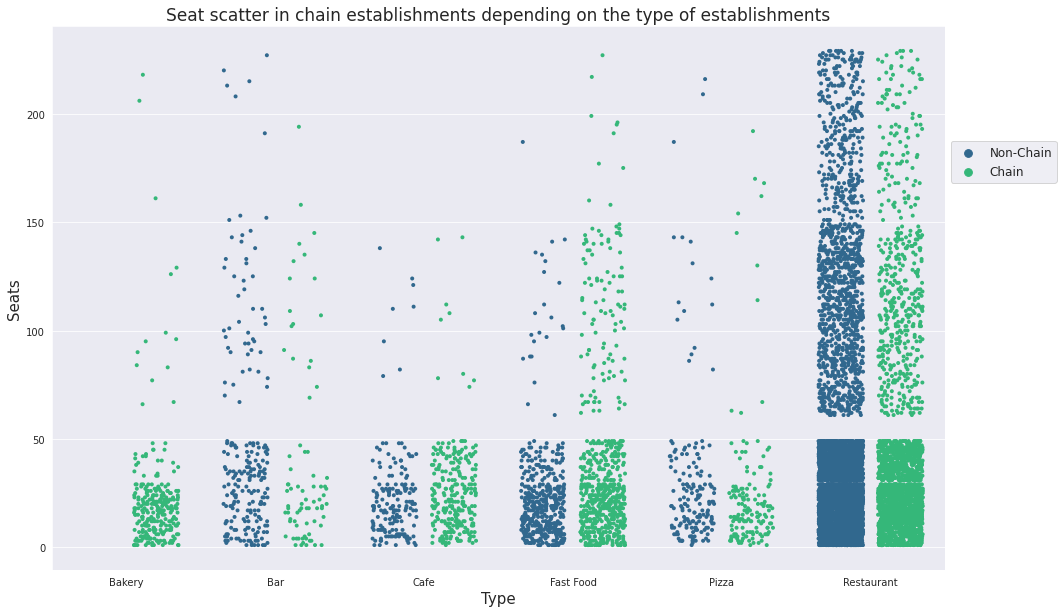

In [58]:
#visualization of establishments of various types and their number of seats distribution

f, ax = plt.subplots(figsize = (16, 10))

plt.title('Seat scatter in chain establishments depending on the type of establishments', fontdict={'size':17})
sns.set_style('darkgrid')
ax=sns.stripplot(x="type",
                 y="seats",
                 hue='chain',
                 data=rest,
                 jitter=0.3,
                 size=4,
                 palette ="viridis",
                 dodge=True) 
#sns.stripplot(x="type", y="seats", data=non_chain_establishments, jitter=0.1, palette=sns.husl_palette(2, l=.6, s=.95), dodge=True, label='non-chain') 
plt.ylabel('Seats', fontdict={'size':15})
plt.xlabel('Type', fontdict={'size':15})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-Chain", "Chain"], fontsize=12, bbox_to_anchor=(1, 0.8))


An interesting observation - it is clearly seen that there are no establishments with the number of seats from 50 to 60.

In [35]:
seat_establishments = rest.query('seats >=49 & seats <=61')

seat_establishments

id                          name                        address  \
37    11823  WABA GRILL                    7109 W SUNSET BLVD              
213   11999  MAHI MAHI                     6122 W SUNSET BLVD              
260   12046  ARADO JAPANESE RESTAURANT     4001 WILSHIRE BLVD STE A        
432   12218  W HOTEL LOS ANGELES/WESTWOOD  930 HILGARD AVE                 
523   12309  FOLLIERO'S PIZZA AND DELI     5566 N FIGUEROA ST              
...     ...                        ...                    ...              
9222  21008  NIPONG NEAPONG                450 S WESTERN AVE # FC4         
9304  21090  EAST GARDEN                   750 N HILL ST STE F             
9339  21125  MENDOCINO FARMS               11911 SA VICENTE BLVD STE 100   
9398  21184  JACK IN THE BOX #3214         1615 S BROADWAY AVE             
9637  21423  BRAAZO PIZZA                  100 1/2 7TH ST                  

      chain        type  seats  
37    True   Restaurant  49     
213   False  Restaurant  49     
260   True   Restaurant  49     
432   False  Restaurant  49     
523   True   Pizza       49     
...    ...     ...       ..     
9222  False  Restaurant  49     
9304  False  Restaurant  49     
9339  True   Restaurant  61     
9398  True   Restaurant  49     
9637  False  Pizza       49     

[130 rows x 6 columns]

**Conclusions**  

Let's look at the distribution of seats depending on the type of establishments and whether it is a chain or non-chain establishments.
Most establishments have up to 50 seats, then we can observe an interesting phenomenon - there are no establishments with a seating capacity of 50 to 60. Perhaps this is due to taxation or the requirement for the premises and the "cost" of a seat for the institution.
It is worth noting that restaurants have a fairly dense distribution of seats from 61 to 229 for both chain and non-chain establishments. We think that this is due to the fact that different celebrations and weddings are held in restaurants and this requires a large number of visitors at the same time.

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.


In [36]:
average_type = (rest.groupby(['type'], as_index=False)
                     .agg({'seats' :'mean'})
                     .rename(columns={'seats':'average'})
                     .round(2)
                     .sort_values(by = 'average', ascending=False))
average_type

type  average
5  Restaurant 48.050  
1  Bar        44.770  
3  Fast Food  31.840  
4  Pizza      28.550  
2  Cafe       25.000  
0  Bakery     21.770

In [37]:
#visualization of average number of seats in various types of establishments

average = average_type['average']
fig = go.Figure(go.Bar(x = average_type['type'],
                     y = average_type['average'],
                     text = average,
                     textposition='outside', marker={'color': average_type['average'],'colorscale': 'cividis_r'},
                     name='chain establishment'))
fig.update_layout(
    title="Average number of seats for various type of establishments",
    title_x = 0.5,
    xaxis_title='Type',
    yaxis_title='Average')
fig.show()

In [38]:
rest_rest = rest.query('type != "Restaurant"')

Text(0.5, 0, 'Seats')

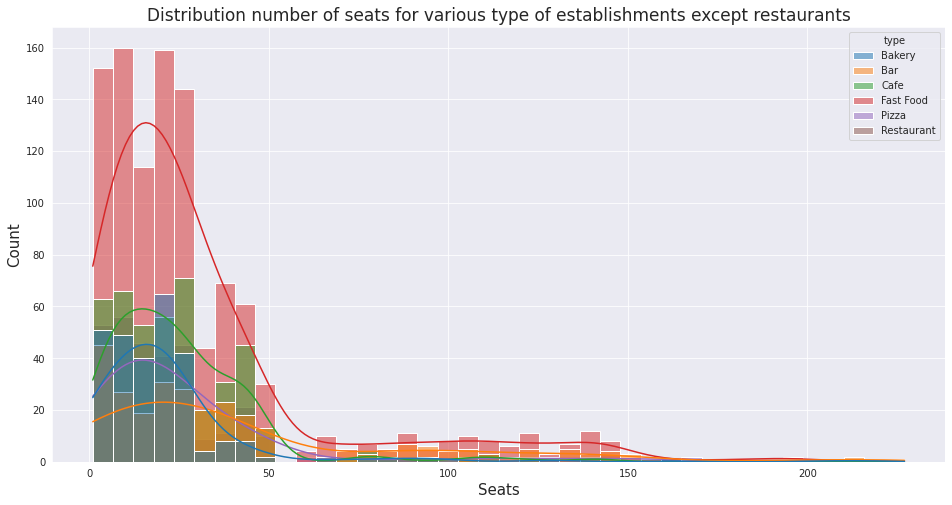

In [39]:
f, ax = plt.subplots(figsize = (16,8))

plt.title('Distribution number of seats for various type of establishments except restaurants', fontdict={'size':17})
sns.set_style('darkgrid')
ax=sns.histplot(x='seats',
                data = rest_rest,
                bins = 40,
                kde = True,
                hue = 'type',
                palette = 'tab10')

plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Seats', fontdict={'size':15})


Text(0.5, 0, 'Seats')

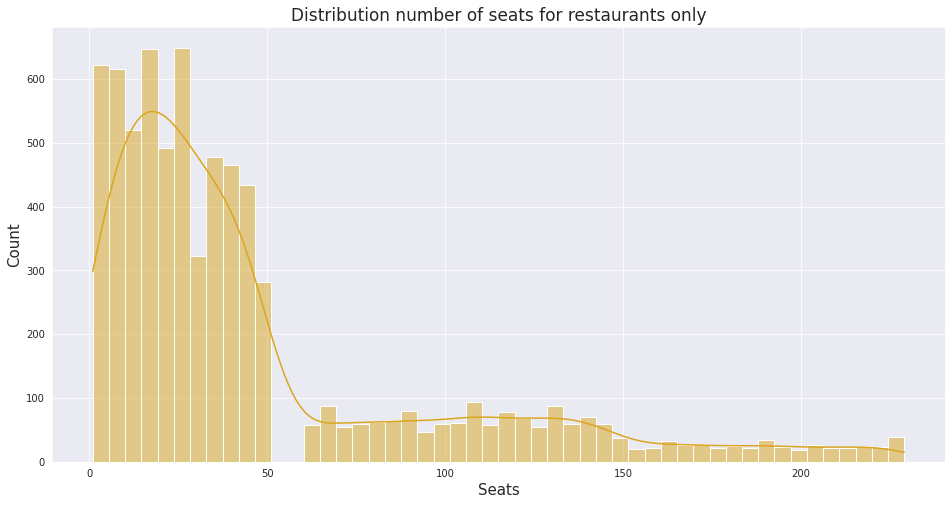

In [40]:
f, ax = plt.subplots(figsize = (16, 8))

plt.title('Distribution number of seats for restaurants only', fontdict={'size':17})
sns.set_style('darkgrid')
ax=sns.histplot(rest.loc[rest['type'] == 'Restaurant', "seats"], bins = 50, kde=True, color='goldenrod')

plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Seats', fontdict={'size':15})



**Conclusions**  
So, let's look at the average number of seats by types of establishments.
We see that in restaurants, on average, the largest number of seats is **48 seats**, in bars, on average - **45 seats**. All other types of establishments, on average, have a significantly smaller number of seats.

In addition, we look closely at the distribution of the number of seats, where we see that almost all establishments, have less than 50 seats, and most of them have no more than 30 seats. This is especially true for fast food and restaurants.


### Put the data on street names from the address column in a separate column

In [41]:
!pip install street-address
from streetaddress import StreetAddressFormatter, StreetAddressParser

addr_parser = StreetAddressParser()
rest['street_name']=rest['address'].apply(lambda x: addr_parser.parse(x)['street_full'])

#check how the parser works
for row in rest['address']:
        rest_addr = addr_parser.parse(row)
        print(rest_addr['street_full'])
    

N EAGLE ROCK BLVD
WORLD WAY
HOLLYWOOD BLVD
W SUNSET BLVD
ECHO AVE
NATIONAL BLVD
WORLD WAY
W 6TH ST
N SAN FERNANDO RD
N CAHUENGA BLVD
W SUNSET BLVD
S WESTERN AVE
W 6TH ST
W SLAUSON AVE
W SUNSET BLVD
S WESTERN AVE
WILSHIRE BLVD
S OXFORD AVE
MELROSE AVE
WORLD WAY
W 6TH ST
W 6TH ST
WILSHIRE BLVD
WALL ST
MELROSE AVE
S SAN VICENTE BLVD
S INDIANA ST
N LA CIENEGA BLVD
W 3RD ST
S ALVARADO ST
3/4 ST
W SUNSET BLVD
S WESTERN AVE
W SUNSET BLVD
W SUNSET BLVD
W SUNSET BLVD
S SAN VICENTE BLVD
W SUNSET BLVD
GLENDALE BLVD
N FIGUEROA ST
S GRAND AVE
W SUNSET BLVD
S LA CIENEGA BLVD
W PICO BLVD
N FIGUEROA ST
WORLD WAY
WORLD WAY
W OLYMPIC BLVD
S FLOWER ST
N VINE ST
W 5TH ST
W OLYMPIC BLVD
S GRAND AVE
W 1ST ST
S HOPE ST
HOLLYWOOD BLVD
WORLD WAY
W SUNSET BLVD
MATEO ST
KNOX AVE
AIRPORT BLVD
S FLOWER ST
WORLD WAY
MARIACHI PLZ
N SAN FERNANDO RD
S FLOWER ST
ROSWELL ST
VERDUGO RD
FRANKLIN AVE
S FLOWER ST
W OLYMPIC BLVD
N SAN FERNANDO RD
PACIFIC AVE
WORLD WAY
W OLYMPIC BLVD
W OLYMPIC BLVD
S GRAND AVE
N VINE ST
N VIN

In [42]:
rest['street_name']=rest['address'].apply(lambda x: addr_parser.parse(x)['street_full'])

In [43]:
rest.head(10)

id                 name                          address  chain  \
0  11786  HABITAT COFFEE SHOP  3708 N EAGLE ROCK BLVD           False   
1  11787  REILLY'S             100 WORLD WAY # 120              False   
2  11788  STREET CHURROS       6801 HOLLYWOOD BLVD # 253        False   
3  11789  TRINITI ECHO PARK    1814 W SUNSET BLVD               False   
4  11790  POLLEN               2100 ECHO PARK AVE               False   
5  11791  THE SPOT GRILL       10004 NATIONAL BLVD              False   
6  11792  CPK                  100 WORLD WAY # 126              False   
7  11793  PHO LALA             3500 W 6TH ST STE 226            False   
8  11794  ABC DONUTS           3027 N SAN FERNANDO RD UNIT 103  True    
9  11795  UPSTAIRS             3707 N CAHUENGA BLVD             False   

         type  seats        street_name  
0  Cafe        26     N EAGLE ROCK BLVD  
1  Restaurant  9      WORLD WAY          
2  Fast Food   20     HOLLYWOOD BLVD     
3  Restaurant  22     W SUNSET BLVD      
4  Restaurant  20     ECHO AVE           
5  Restaurant  14     NATIONAL BLVD      
6  Restaurant  100    WORLD WAY          
7  Restaurant  7      W 6TH ST           
8  Fast Food   1      N SAN FERNANDO RD  
9  Restaurant  35     N CAHUENGA BLVD

**Conclusions**  

In order to get the streets from the address we used the street-address library, with it we get a column with the name of the street, which comes with the street type and direction, since streets like SUNSET BLVD can go through the whole city and the distance from the west beyond eastern part are significant.

### Plot a graph of the top ten streets by number of restaurants.

In [44]:
top_ten_rest = (rest.groupby('street_name', as_index=False)
                     .agg({'name' : 'count', 'seats': 'sum'})
                     .rename(columns={'name':'number_establishments', 'seats' : 'total_number_of_seats'})
                     .sort_values(by = 'number_establishments', ascending=False)
                     .head(10))
top_ten_rest

street_name  number_establishments  total_number_of_seats
746  WILSHIRE BLVD      384                    20087                
713  W SUNSET BLVD      368                    17945                
708  W PICO BLVD        342                    13535                
573  S WESTERN AVE      277                    11351                
585  SANTA MONICA BLVD  262                    9164                 
223  HOLLYWOOD BLVD     241                    13703                
707  W OLYMPIC BLVD     234                    12079                
645  W 3RD ST           231                    9050                 
494  S FIGUEROA ST      228                    11181                
651  W 6TH ST           213                    8543

In [45]:
#calculating total number of establishments in these streets
print('Total number of establishments on 10 top streets:', top_ten_rest['number_establishments'].sum())

Total number of establishments on 10 top streets: 2780


In [46]:
#percents = rest_chain_type['percent'].round(2)

fig = go.Figure(go.Bar(x = top_ten_rest['street_name'],
                     y = top_ten_rest['number_establishments'],
                     text = top_ten_rest['number_establishments'],
                     textposition='outside',
                     marker={'color': top_ten_rest['number_establishments'],'colorscale': 'cividis_r'},))
fig.update_layout(
    title="Top 10 streets by number of establishments",
    title_x = 0.5,
    xaxis_title='Street names',
    yaxis_title='Count')
fig.show()

**Conclusions**  
So, if we look at the list of the top 10 streets with the most establishments, we can replace an interesting pattern - **most streets are represented in their western part**. As mentioned earlier - most of the streets in LA are long and the western, eastern or northern and southern parts, in fact, are different streets and will be located in completely different parts of the city. The study of the streets by directions gives us a clearer picture of where the main center of the concertation of restaurants is located. In this case, these are **Beverly Hills, Hollywood, Wilshire Place and Melrose Hills**, which is basically expected.

Total number of establishments on 10 main streets: **2780**.  

**Top 3 by number of restaurants:**

    WILSHIRE BLVD-384 ||  W SUNSET BLVD - 368   ||   W PICO BLVD - 342

<img src="https://i.ibb.co/mBr2n4p/LA-rest-legend.jpg" alt="LA-rest" border="0" width="750">

### Find the number of streets that only have one restaurant.

In [47]:
only_one_rest = (rest.groupby('street_name', as_index=False)
                     .agg({'name' : 'count' })
                     .rename(columns={'name':'count'})
                     .query('count == 1'))
only_one_rest=only_one_rest['street_name']
one_rest_streets = rest[rest['street_name'].isin(only_one_rest)]

In [48]:
#calculating total number of establishments in these streets

print('Number of streets that only have one restaurant:', len(only_one_rest))

Number of streets that only have one restaurant: 341


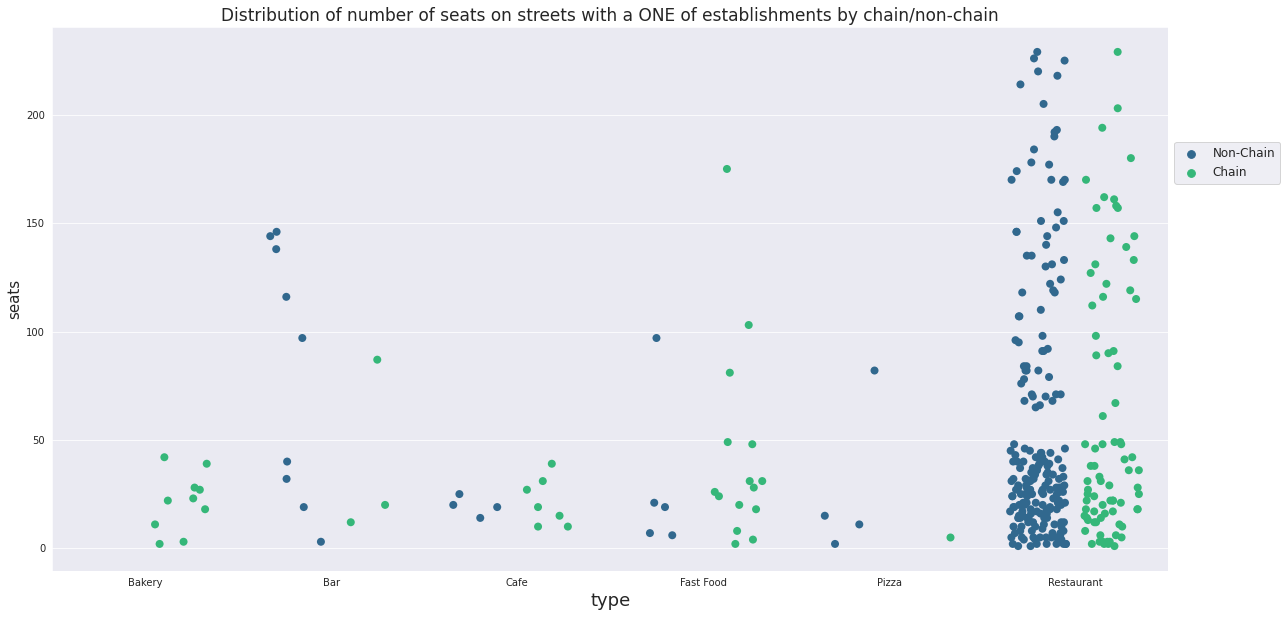

In [49]:
f, ax = plt.subplots(figsize = (20, 10))
plt.title('Distribution of number of seats on streets with a ONE of establishments by chain/non-chain', fontdict={'size':17})
sns.set_style('darkgrid')
ax=sns.stripplot(x="type",
                 y="seats",
                 hue='chain',
                 data=one_rest_streets,
                 jitter=0.3,
                 size=8,
                 palette ="viridis",
                 dodge=True) 
plt.ylabel('seats', fontdict={'size':15})
plt.xlabel('type', fontdict={'size':18})
#ax.set_xticklabels(top_15_rest, rotation=-45, fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-Chain", "Chain"], fontsize=12, bbox_to_anchor=(1, 0.8))

If we look at the streets where there is only one restaurant.  
Number of streets with only one restaurant: 341.
The distribution by types of establishments and affiliation to chain / non-chain restaurants shows that these are mainly non-chain restaurants.
We can understand that such restaurants can be located conveniently for residents and be local restaurants with authentic or fine cuisine. The scatter of seats also shows us that there is no pattern.

### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?


In [50]:
rest['seats'].describe()

count   9,648.000
mean    43.704   
std     47.627   
min     1.000    
25%     14.000   
50%     27.000   
75%     46.000   
max     229.000  
Name: seats, dtype: float64

In [51]:
top_15_rest = (rest.groupby('street_name', as_index=False)
                     .agg({'name' : 'count', 'seats': 'sum'})
                     .rename(columns={'name':'number_establishments', 'seats' : 'total_number_of_seats'})
                     .sort_values(by = 'number_establishments', ascending=False)
                     .head(15))
top_15_rest = top_15_rest['street_name']

#creating data slice to work with
top_streets_rest = rest[rest['street_name'].isin(top_15_rest)]
top_streets_rest.groupby(['street_name'])['seats'].describe()

count   mean    std   min    25%    50%    75%     max
street_name                                                               
BEVERLY BLVD      161.000 43.366 42.733 1.000 17.000 28.000 45.000 218.000
HOLLYWOOD BLVD    241.000 56.859 58.784 1.000 17.000 34.000 80.000 229.000
MELROSE AVE       149.000 48.550 45.905 1.000 14.000 32.000 83.000 222.000
S FIGUEROA ST     228.000 49.039 50.976 1.000 16.000 26.000 64.500 226.000
S ST              130.000 40.654 45.297 1.000 13.000 24.000 44.000 195.000
S VERMONT AVE     212.000 44.156 47.809 1.000 14.000 28.000 45.000 227.000
S WESTERN AVE     277.000 40.978 41.370 1.000 14.000 29.000 44.000 198.000
SANTA MONICA BLVD 262.000 34.977 40.354 1.000 11.000 22.000 40.750 225.000
W 3RD ST          231.000 39.177 40.544 1.000 13.000 25.000 44.000 175.000
W 6TH ST          213.000 40.108 43.716 1.000 14.000 23.000 44.000 214.000
W OLYMPIC BLVD    234.000 51.620 57.293 1.000 15.000 29.000 48.000 226.000
W PICO BLVD       342.000 39.576 40.754 1.000 13.000 26.500 44.750 220.000
W SUNSET BLVD     368.000 48.764 49.512 1.000 16.000 34.000 49.000 229.000
WILSHIRE BLVD     384.000 52.310 50.944 1.000 18.750 36.000 65.500 229.000
WORLD WAY         145.000 51.179 52.342 1.000 17.000 31.000 73.000 225.000

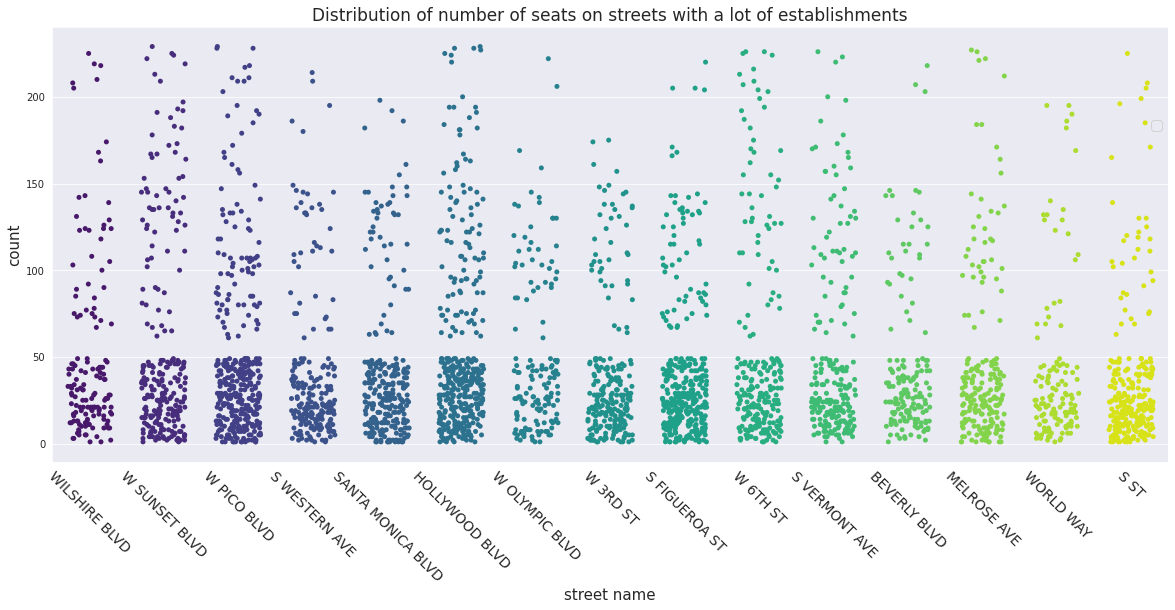

In [52]:
f, ax = plt.subplots(figsize = (20, 8))
plt.title('Distribution of number of seats on streets with a lot of establishments', fontdict={'size':17})
sns.set_style('darkgrid')
ax=sns.stripplot(x="street_name",
                 y="seats",
                 data=top_streets_rest,
                 jitter=0.3,
                 size=5,
                 palette ="viridis",
                 dodge=True) 
plt.ylabel('count', fontdict={'size':15})
plt.xlabel('street name', fontdict={'size':15})
ax.set_xticklabels(top_15_rest, rotation=-45, fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, fontsize=13,  bbox_to_anchor=(1, 0.8))

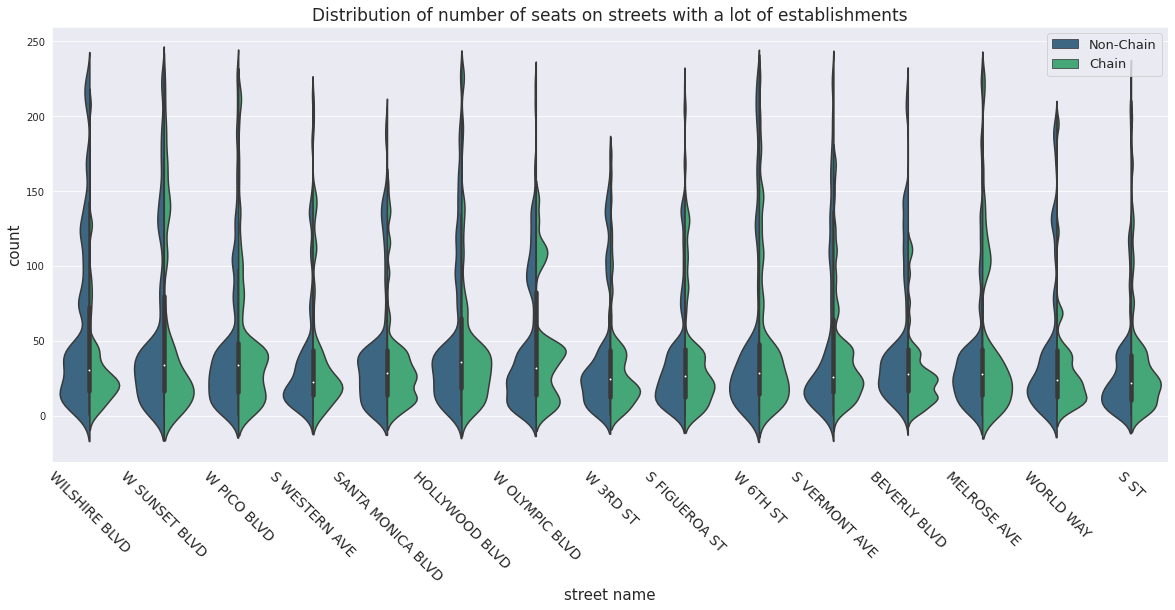

In [53]:
f, ax = plt.subplots(figsize = (20, 8))
plt.title('Distribution of number of seats on streets with a lot of establishments', fontdict={'size':17})
sns.set_style('darkgrid')
ax=sns.violinplot(x="street_name",
                 y="seats",
                 hue='chain',
                 data=top_streets_rest,
                 jitter=1,
                 size=2,
                 palette ="viridis",
                 split=True,
                 bw=.15,
                 scale="width") 
plt.ylabel('count', fontdict={'size':15})
plt.xlabel('street name', fontdict={'size':15})
ax.set_xticklabels(top_15_rest, rotation=-45, fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-Chain", "Chain"],  fontsize=13,  bbox_to_anchor=(1, 1))

We see that 5 streets stand out: W PICO BLVD, W SUNSET BLVD, HOLLYWOOD BLVD, W 6TH ST, VERMONT and WILSHIRE BLVD - these streets have more establishments with more seats. However, it is worth noting that the average number of seats does not differ much and is in the range of 28-36 seats. In addition, most of these streets have establishments with 229 seats.


In [54]:
top_5_rest = (rest.groupby('street_name', as_index=False)
                     .agg({'name' : 'count', 'seats': 'sum'})
                     .rename(columns={'name':'number_establishments', 'seats' : 'total_number_of_seats'})
                     .sort_values(by = 'number_establishments', ascending=False)
                     .head(5))
top_5_rest = top_5_rest['street_name']

#creating data slice to work with
top_5streets_rest = rest[rest['street_name'].isin(top_5_rest)]

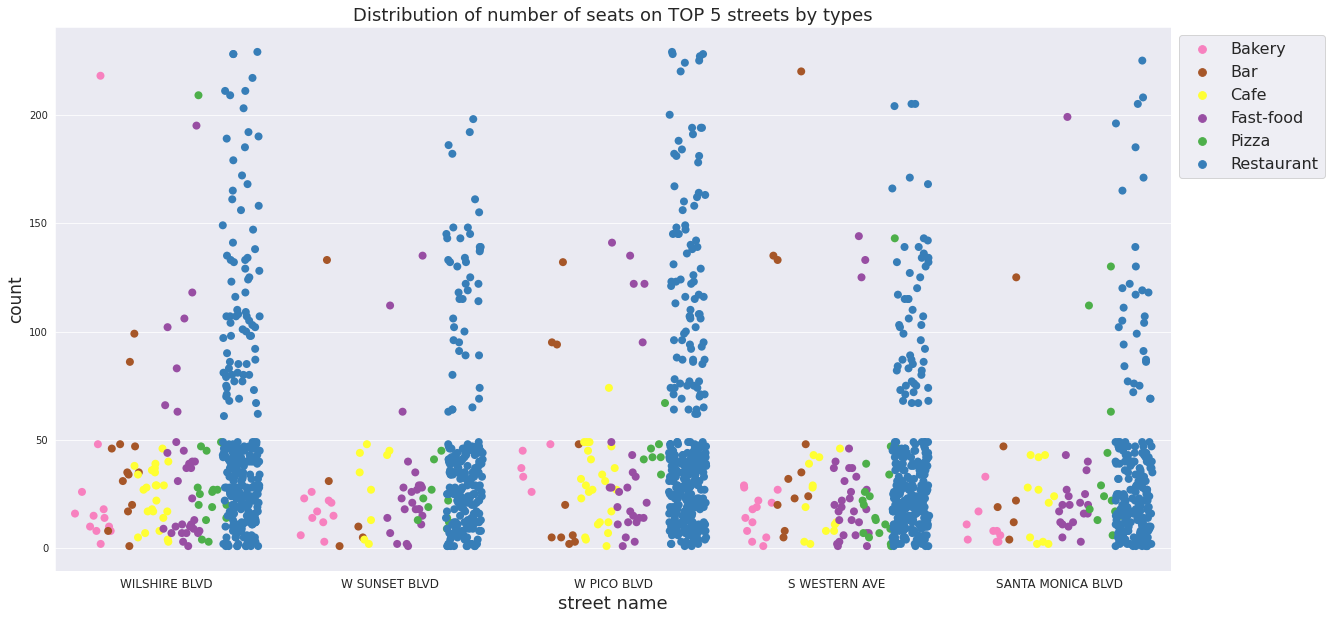

In [55]:
f, ax = plt.subplots(figsize = (20, 10))
plt.title('Distribution of number of seats on TOP 5 streets by types', fontdict={'size':18})
sns.set_style('darkgrid')
ax=sns.stripplot(x="street_name",
                 y="seats",
                 hue='type',
                 data=top_5streets_rest,
                 jitter=0.5,
                 size=8,
                 palette ="Set1_r",
                 dodge=True) 
plt.ylabel('count', fontdict={'size':17})
plt.xlabel('street name', fontdict={'size':18})
ax.set_xticklabels(top_5_rest, fontsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Bakery", "Bar", "Cafe", "Fast-food", "Pizza", "Restaurant"], fontsize=16, loc='best', bbox_to_anchor=(1, 1))

If we carefully consider the structure of the distribution of types of establishments and the number of seats on the top 5 streets, we will see that restaurants are represented the most and they are not limited by seats, there are also many fast food restaurants. Moreover, we can see that there are fast food restaurants with a large number of seats on WILSHIRE BLVD and W PICO BLVD streets. All cafes, bars and pizzas included in our sample up to 50 seats.

## Conclusions

1.  Most of all `Restaurants` are represented in our database - 7253. This is seven times more than `Fast Food` - 1066.
We also checked the distribution of values in the `seat` column, from **1 to 229 seats**. It is possible that establishments that have **one** seat are establishments that provide takeaway food. In the future, we will consider separately both establishments with one 'seats' and restaurants.


2. We see that the two chains are represented the most - these are **`THE COFFEE BEAN & TEA LEAF`** (type - `Cafe`, 47 establishments) and **`SUBWAY`** (type - `Fast Food`, 31 establishments).
We have addresses where there are from 9 or more establishments. It is possible that these are business or shopping centers. For example, 3607 TROUSDALE PKWY, which contains 11 establishments of all types. Checking the address showed it was a UNIVERSITY OF SOUTHERN CALIFORNIA.


3. We explore the proportions of different types of establishments and build a pie. So LA is dominated by `Restaurants` with **7253**, then we see a significant amount of `Fast Foods` with **1066** entries. Pizzas, Bars and Bakeries in much smaller numbers - **319, 292 and 283 entries** respectively.
If you look at the distribution in percentage terms, then restaurants occupy **73%** of all establishments, fast food - **11%**, all other types ranging from **3 to 4.5%**.
 In terms of the number of seats, restaurants take a confident first place with 348,498 seats (the sum of seats in all restaurants) or 83%. The second place in terms of the number of seats is occupied by fast food establishments - 33939 and 8%, respectively.
 
 
4. We see that the distribution of our establishments into chain and non-chain from all establishments does not differ much depending on the establishment and the number of seats - about **62-65% non-chain and 38-36% chain establishments**


5. Restaurants are the most represented in our data, let's look at them first - **31.6%** of the total or **2292** `restaurants` are chain restaurants. Perhaps this is due to the fact that in restaurants, diners are more looking for uniqueness, the best cuisine and new experiences.
With `bars`, the story is the same as with restaurants, only **26%** are chains. It is possible that this is also due to the unique atmosphere that people want to get in the bar.
Next, consider `fast food, cafes and pizzerias` - which are from **48 to 62%**, i.e. half or more of this type of establishments are chain. This can be explained by the fact that it is easier for chain establishments to engage in advertising and promotion, and they are recognizable in any city.
Also interesting is the discovery that **100%** of `bakeries` are chains, but we must remember that they only make up 3% of our data.


6. About the distribution of seats depending on the type of establishments and whether it is a chain or non-chain establishments.
Most establishments have up to 50 seats, then we can observe an interesting phenomenon - there are no establishments with a seating capacity of 50 to 60. Perhaps this is due to taxation or the requirement for the premises and the "cost" of a seat for the institution.
It is worth noting that restaurants have a fairly dense distribution of seats from 61 to 229 for both chain and non-chain establishments. We think that this is due to the fact that different celebrations and weddings are held in restaurants and this requires a large number of visitors at the same time.


7. The average number of seats by types of establishments.
We see that in restaurants, on average, the largest number of seats is **48 seats**, in bars, on average - **45 seats**. All other types of establishments, on average, have a significantly smaller number of seats.
In addition, we look closely at the distribution of the number of seats, where we see that almost all establishments, have less than 50 seats, and most of them have no more than 30 seats. This is especially true for fast food and restaurants.


8. In order to get the streets from the address we used the street-address library, with it we get a column with the name of the street, which comes with the street type and direction, since streets like SUNSET BLVD can go through the whole city and the distance from the west beyond eastern part are significant.


9. So, if we look at the list of the top 10 streets with the most establishments, we can replace an interesting pattern - **most streets are represented in their western part**. As mentioned earlier - most of the streets in LA are long and the western, eastern or northern and southern parts, in fact, are different streets and will be located in completely different parts of the city. The study of the streets by directions gives us a clearer picture of where the main center of the concertation of restaurants is located. In this case, these are **Beverly Hills, Hollywood, Wilshire Place and Melrose Hills**, which is basically expected.
Total number of establishments on 10 main streets: **2780**.  
**Top 3 streets by number of restaurants:**

    WILSHIRE BLVD-384 ||  W SUNSET BLVD - 368   ||   W PICO BLVD - 342
    
 
 
10. Number of streets with only one restaurant: **341**. The distribution by types of establishments and affiliation to chain / non-chain restaurants shows that these are mainly non-chain restaurants.
We can understand that such restaurants can be located conveniently for residents and be local restaurants with authentic or fine cuisine. The scatter of seats also shows us that there is no pattern.    


11. If we carefully consider the structure of the distribution of types of establishments and the number of seats on the top 5 streets, we will see that restaurants are represented the most and they are not limited by seats, there are also many fast food restaurants. Moreover, we can see that there are fast food restaurants with a large number of seats on WILSHIRE BLVD and W PICO BLVD streets. All cafes, bars and pizzas included in our sample up to 50 seats.

## Step 3. Preparing a presentation

Make a presentation of your research to share with investors.

**Presentation**: https://drive.google.com/file/d/1i933L1ZUGEOZWrKIk1qHu2rXwx5WsHhs/view?usp=sharing

## Recommendations

Based on our research, we recommend opening a **small cafe**.

The optimal number of **seats is 25-30**.  

The cafe must be located on one of the five most popular streets - **W PICO BLVD, W SUNSET BLVD, W WESTERN AVE, SANTA MONICA BLVD and WILSHIRE BLVD**. It is also worth finding a place so that there are shopping centers or business centers nearby. This will attract new visitors and increase the number of native ads to promote the cafe.

We recommend that you pay attention to the possibility of a **social project to attract people with disabilities** as people who control robots in a cafe.

**ROBOT•RUN Cafe** will be the world's most advanced cafe system with best-in-class sanitation, performance and menu variety.